### Student Information
Name:
鍾明遠

Student ID:
108011557

GitHub ID:
mchung0417

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

---

###  > First - take home excercise in DM Lab1 Master

 Exercise 2 (take home):
 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh


categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.iloc[15:2000:5,0:4:2][0:15]

,text,category_name
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,comp.graphics
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,comp.graphics
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
35,From: BOCHERC@hartwick.edu Subject: Does God L...,soc.religion.christian
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian
45,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,alt.atheism
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,comp.graphics
55,From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,alt.atheism


---

Exercise 5 (take home):

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
NA_df.replace(to_replace=['NaN','None',''], value=np.nan,inplace=True)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

Because isnull() function can only find judge np.nan kind missing value

in order to use it properly,I replace the different kind of missing value to np.nan

that makes isnull() function works

--- 

 Exercise 6 (take home):
        
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
len(X)

2257

In [7]:
X_sample = X.sample(n=1000) #random state

In [8]:
len(X_sample)

1000

In [9]:
X_sample.sort_index()

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
17,Organization: Penn State University From: <JSN...,0,alt.atheism
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics


I found that X_sample is random select form X , everytime I try to sample it,

X_sample is different , I thought that if I want to get the proper subset from X,

I should add some conditions like 'sample from each category proportional 

---

Exercise 8 (take home):

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [10]:
import matplotlib.pyplot as plt
class_a= X.category_name.value_counts()
class_b = X_sample.category_name.value_counts()
plt.figure(figsize=(8,6))
plt.bar(categories, class_a, label = 'class_a', align = "edge", width = -0.25)
plt.bar(categories, class_b, label = 'class_b', align = "edge", width = 0.25)
plt.legend(labels=['X','X_sample'])
plt.ylabel('counts')
plt.title('Category distribution')
plt.show()

<Figure size 800x600 with 1 Axes>

---

 Exercise 10 (take home):
 
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [12]:
X_counts_array = np.array(X_counts[4:5,0:100].toarray())
feature_name = count_vect.get_feature_names()
index1 = np.where(X_counts_array==1)
feature_name[index1[1][1]]

'01'

every `1` in `X_counts` correspond to a term(feature name),we can obtain feature name by `get_feature_names()`

I find the index position of `1` element in `X_count` and its corresponding term 

the answer that second `1` in `X_counts[4:5]` represents `01`.

---

Exercise 11 (take home):

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [13]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[10000:10050]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 10000:10050].toarray()

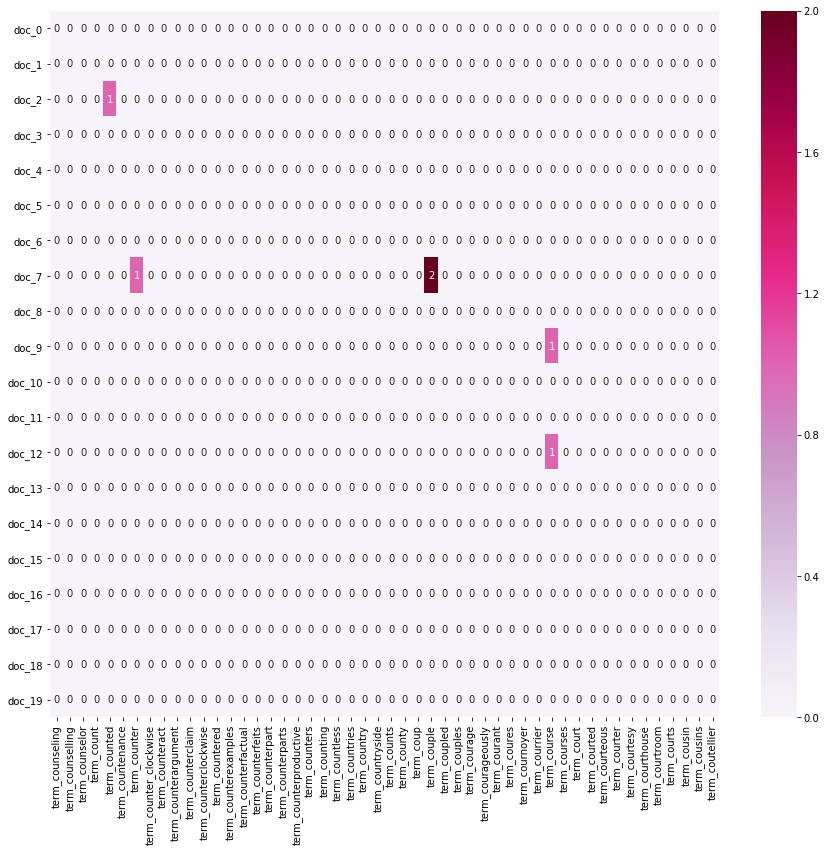

In [14]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 13))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

---

 Exercise 12 (take home):
 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

In [16]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

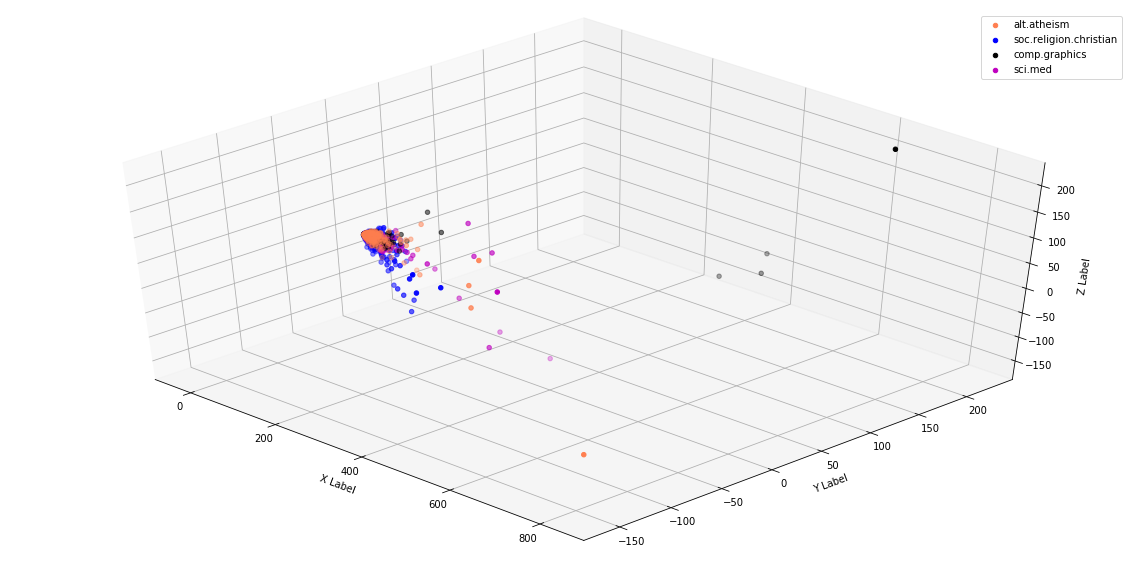

In [17]:
col = ['coral', 'blue', 'black', 'm']

# plot view 0
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')
ax.view_init(elev=45,azim=-45)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.legend(categories)
plt.show()


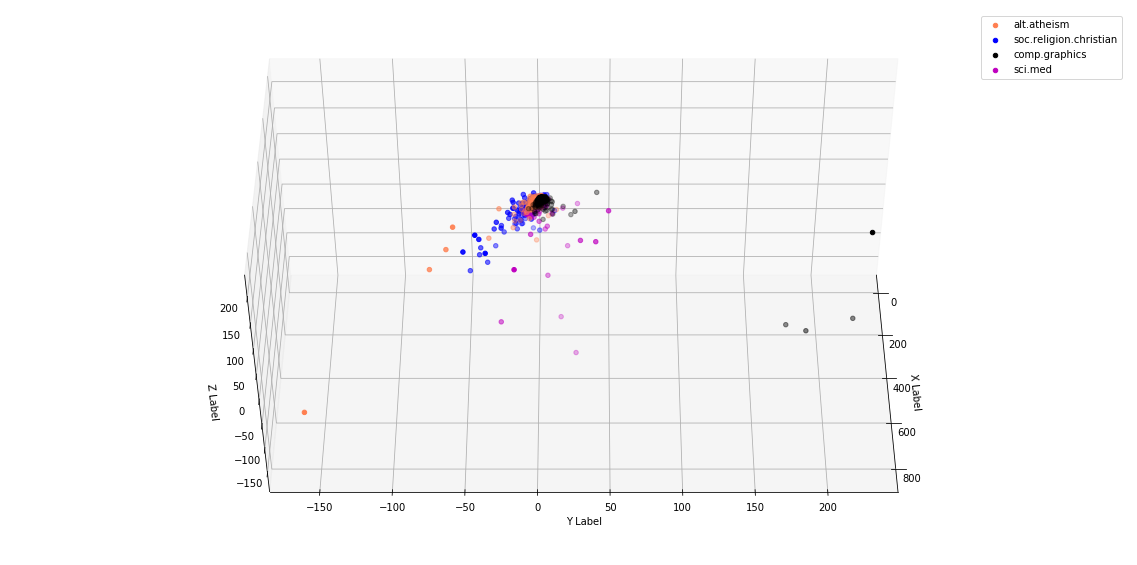

In [18]:
# plot view 1
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')
ax.view_init(elev=45,azim=0)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.legend(categories)
plt.show()

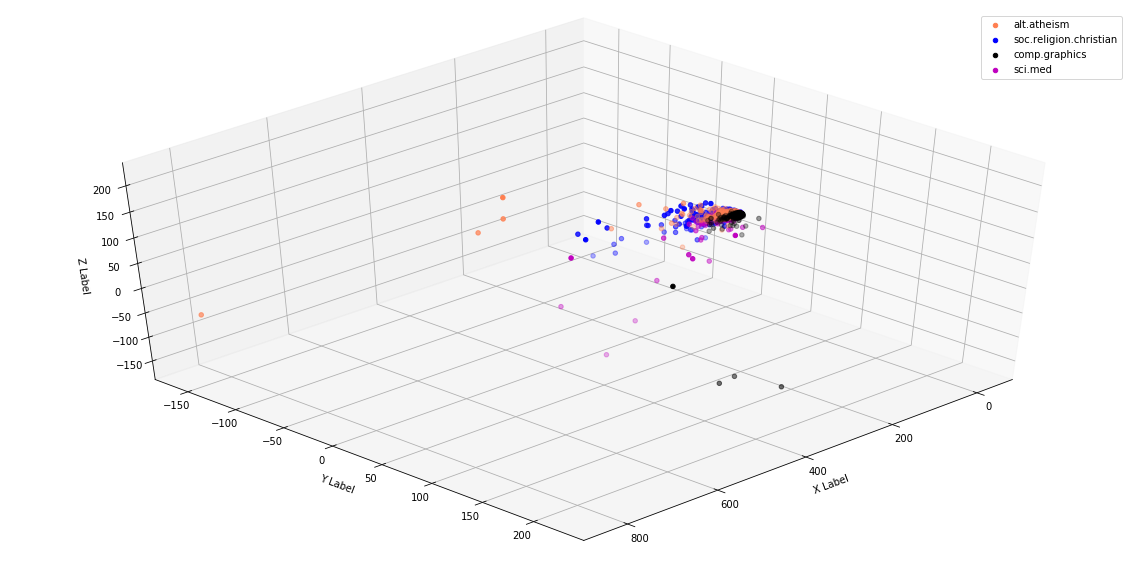

In [19]:
# plot view 2
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')
ax.view_init(elev=45,azim=45)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.legend(categories)
plt.show()

---

Exercise 13 (take home):
 
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

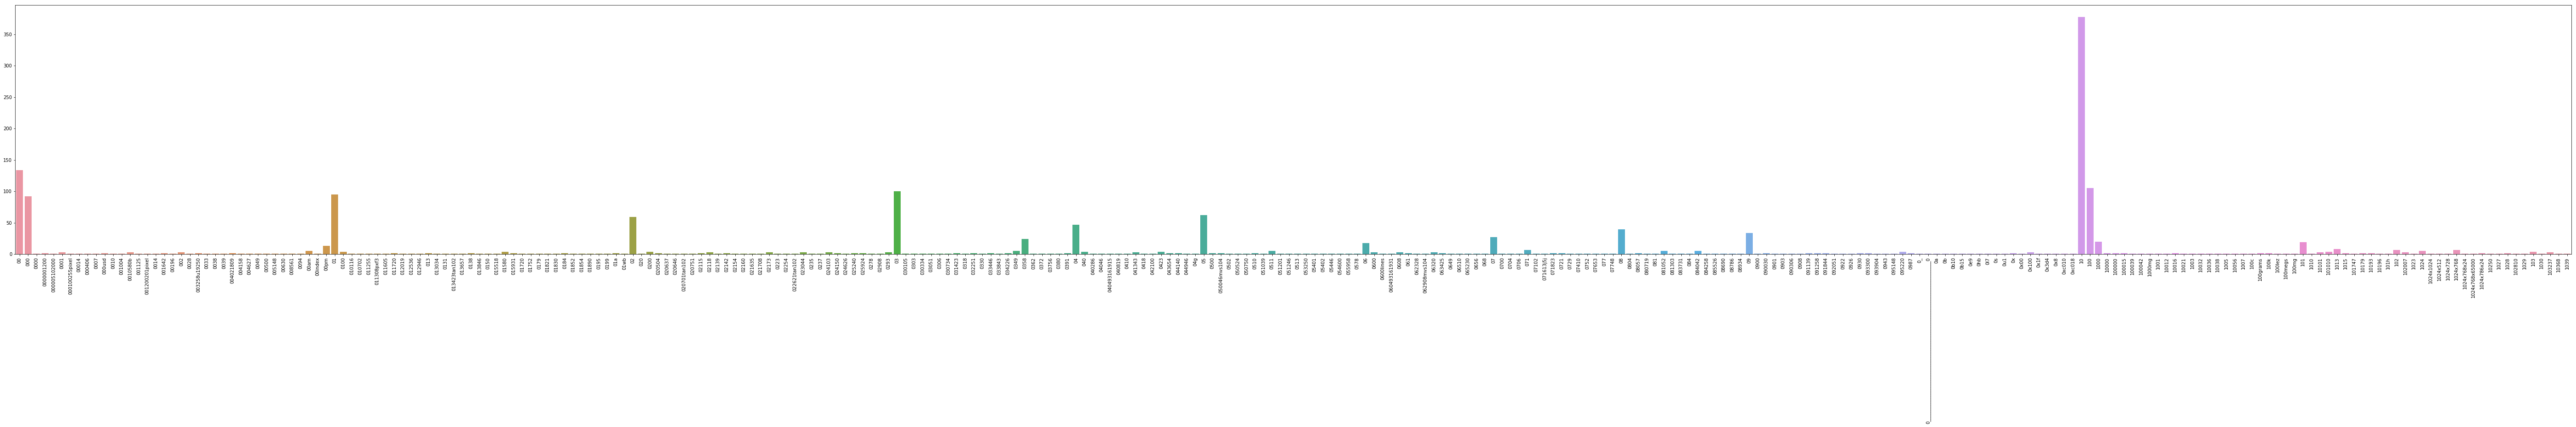

In [20]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [21]:
from plotly.graph_objs import Bar,Layout 
import plotly 
import plotly.offline as py 
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected = True)

trace = go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300],name = 'counts')
datas = [trace]
layout = go.Layout(title='Counts of each term')

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

---

Exercise 14 (take home):

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

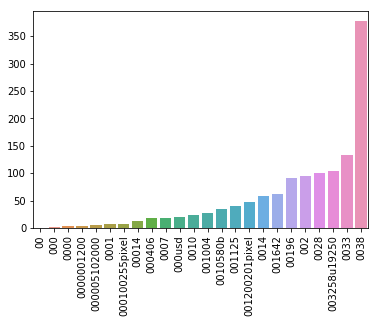

In [33]:
efficient_term_frequencies = pd.DataFrame(X_counts.toarray()).iloc[:,0:300]
term_counts= efficient_term_frequencies.sum()
efficient = sns.barplot(x=term_counts, 
            y=term_frequencies)
efficient.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

Exercise 15 (take home):

Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [34]:
longtail = pd.DataFrame(term_frequencies,index = count_vect.get_feature_names(),columns=['counts'])
longtail.sort_values(by = ['counts'],axis = 0,ascending = False,inplace = True)
longtail[0:10]

,counts
the,29825
of,17660
to,17222
and,13017
is,12343
in,11226
that,10723
it,8447
you,6157
for,5962


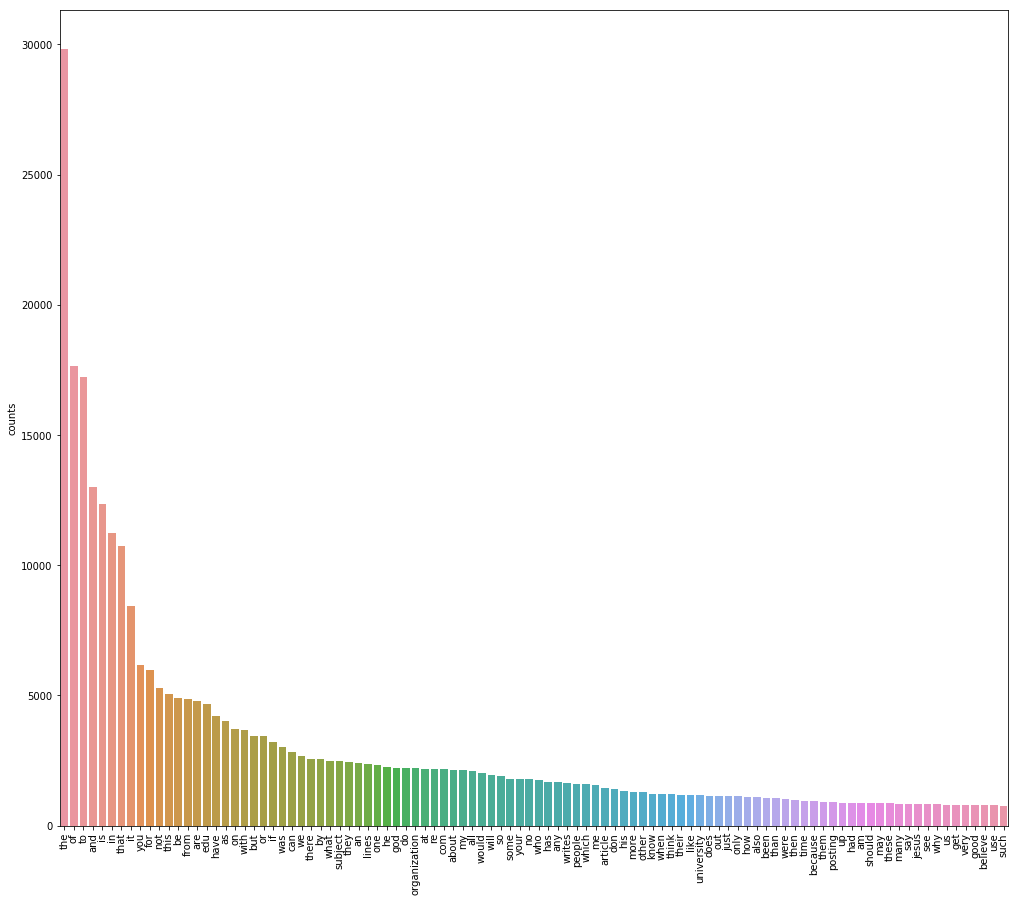

In [39]:
plt.subplots(figsize=(17,15))
LT = sns.barplot(x=longtail.index[0:100], 
            y=longtail.counts[0:100])
LT.set_xticklabels(longtail.index[0:100], rotation = 90);

---

Exercise 16 (take home):

Try to generate the binarization using the `category_name` column instead. Does it work?

In [40]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [41]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [42]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [43]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


It still works,from`mlb.classes_` we can observe that there are 4 classes in `category_name`,so it still is able to turn the column into banarization

###  > Second - The new dataset,follow the steps in DM Lab1 msater

In [44]:
imdb = pd.read_csv('imdb_labelled.txt',sep='\t',header = None)
imdb.columns = ['sentence','score']
amazon = pd.read_csv('amazon_cells_labelled.txt',sep='\t',header = None)
amazon.columns = ['sentence','score']
yelp = pd.read_csv('yelp_labelled.txt',sep='\t',header = None)
yelp.columns = ['sentence','score']
Y = pd.concat([imdb,amazon,yelp],axis = 0)
Y.reset_index(drop=True, inplace=True)
Y_test = Y.sample(n=1000)
Y[0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [45]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [46]:
len(Y[Y.duplicated('sentence',keep = False)])

34

In [47]:
Y.drop_duplicates(keep='first', inplace=True)

I cascade imdb,yelp,amazon three data set to Y 

check it and there is no null value in 'sentance' and 'score' columns

find out there are 34 duplicate 'sentence' and they have same 'score'

so I keep the duplicate 'sentance' that shows first time and delete the others.

In [48]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import pandas as pd
word_tokenize = RegexpTokenizer('\w+')
Y['sentence'] = Y['sentence'].str.lower()
Y['sentence']= Y['sentence'].apply(lambda x:word_tokenize.tokenize(x))
Y['sentence'].iloc[0:5]

0    [a, very, very, very, slow, moving, aimless, m...
1    [not, sure, who, was, more, lost, the, flat, c...
2    [attempting, artiness, with, black, white, and...
3    [very, little, music, or, anything, to, speak,...
4    [the, best, scene, in, the, movie, was, when, ...
Name: sentence, dtype: object

lower the letters then use RegexpTokenizer to tokenize the sentence and remove the punctuation mark

In [49]:
stop = stopwords.words('english')
Y['sentence']=Y['sentence'].apply(lambda x: [item for item in x if item not in stop])
Y['sentence'].iloc[0:5]

0    [slow, moving, aimless, movie, distressed, dri...
1    [sure, lost, flat, characters, audience, nearl...
2    [attempting, artiness, black, white, clever, c...
3                     [little, music, anything, speak]
4    [best, scene, movie, gerardo, trying, find, so...
Name: sentence, dtype: object

remove the stopwords

In [50]:
stemming=PorterStemmer()
Y['sentence']=Y['sentence'].apply(lambda x:[stemming.stem(word) for word in x])
Y['sentence']=Y['sentence'].apply(lambda x:' '.join(x))
Y[0:5]

,sentence,score
0,slow move aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1


stemming the words,then return list to str

After the steps above, I get the clean dataset for further analysis

###  > Third - The new dataset,TF IDF and Naive Bayes classifier

0    1493
1    1490
Name: score, dtype: int64


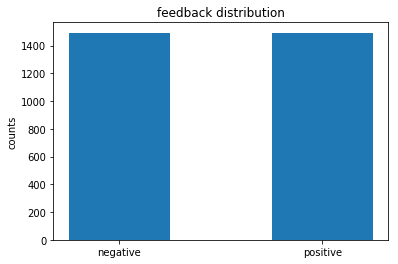

In [51]:
import matplotlib.pyplot as plt
[count0,count1]=Y['score'].value_counts()
print(Y.score.value_counts())
plt.figure()
plt.bar(['negative','positive'],[count0,count1],width=0.5)
plt.ylabel('counts')
plt.title('feedback distribution')
plt.show()

-

For data exploration and visualization,I count the number of different kind of feedback.

As the histogram , we can found that the count of different feedback is almost the same.

I think it is a good news that means there is no data imblanced question.

-

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer = CountVectorizer()
Y_vec = vectorizer.fit_transform(Y.sentence)
word = vectorizer.get_feature_names()

words = {}
for i in range(len(word)):
    words[i]=word[i]
tf = pd.DataFrame(Y_vec.toarray())
tf = tf.rename(words,axis = 1)
tf.loc['count']=tf.sum(axis = 0)

tf_= pd.DataFrame(tf.loc['count'])
tf_.sort_values(by = 'count',ascending=False,inplace = True)
tf_ = tf_.apply(lambda x :x/tf_['count'].sum())
tf_[0:5]

,count
good,0.012677
movi,0.011685
great,0.011299
film,0.010417
phone,0.009590


In [ ]:
plt.figure()
tf_[0:25].plot(kind ='barh',title='word frequency',figsize=(5,7),legend = None)
plt.show()

In [ ]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(Y_vec)
tfidf = pd.DataFrame(tfidf.toarray())
tfidf = tfidf.rename(words,axis = 1)
tfidf_ = pd.DataFrame(tfidf.mean(axis=0),word)
tfidf_.columns=['tfidf']
tfidf_.sort_values(by='tfidf',ascending=False,inplace = True)
tfidf_[0:5]

In [ ]:
plt.figure()
tfidf_[0:25].plot(kind ='barh',title='TFIDF',figsize=(5,7),legend = None)
plt.show()

I've done both TF(word frequency) and TF-IDF,there is just a little difference between them.

I think it is because I have removed the stopwords before.

as the histogram ,words like 'good','great','recommend' probably represent positive feedback.

and words like 'bad','disappoint','wast' represent negative feedback.

else like 'movi','film' show that the feedback is about movies, but for classification,them might be neutral.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Y_counts = count_vect.fit_transform(Y.sentence)

tokenize training text

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(Y_counts)
Y_tf = tf_transformer.transform(Y_counts)
Y_tf.shape

generate term frequency feature

In [ ]:
tfidf_transformer = TfidfTransformer()
Y_tfidf = tfidf_transformer.fit_transform(Y_counts)
Y_tfidf.shape

generate TF-IDF feature

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_tf = MultinomialNB().fit(Y_tf, Y.score)
clf_tfidf = MultinomialNB().fit(Y_tfidf, Y.score)

training two different classifier,one base on TF,another based on TF-IDF

In [ ]:
Y_test [0:5]

Y_test is the random from raw data

In [ ]:
Y_test_counts = count_vect.transform(Y_test.sentence)
Y_test_counts.shape

use 'count_vect.transform' instead of 'count_vect.fit_transform' 

to make testing set's features fit the features of training set

In [ ]:
Y_test_tf = tf_transformer.transform(Y_test_counts)
Y_test_tf.shape

In [ ]:
Y_test_tfidf = tfidf_transformer.transform(Y_test_counts)
Y_test_tfidf.shape

check that the feature map is equivalent

In [ ]:
tf_predicted = clf_tf.predict(Y_test_tf)
tfidf_predicted = clf_tfidf.predict(Y_test_tfidf)

pridict the result

In [ ]:
import numpy as np
tf_acc = np.mean(tf_predicted == Y_test.score)
tfidf_acc = np.mean(tfidf_predicted == Y_test.score)
print('Accuracy of TF classifer is {:f}'.format(tf_acc))
print('Accuracy of TF-IDF classifer is {:f}'.format(tfidf_acc))

In [ ]:
from sklearn import metrics
tf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.score, tf_predicted))
tf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of TF classifer')
tf_matrix

In [ ]:
tfidf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.score, tfidf_predicted))
tfidf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tfidf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of TF-IDF classifer')
tfidf_matrix

from the result we can observe that the performance of TF-IDF classifier is slightly better than TF classifier

because I have removed the stopwords in pre-processing ,so the difference between TF and TFIDF is not that obvious

but when apply IDF to the feature maps ,it reduce the importance of the common words (like 'movi','film')in documents

it improve the performace of classifier

---

###  > Fourth - Improve the pre-processing of movie comment dataset

In pre-processing above , I found the there are some neutral words like 'movi','film',in each comment,so I tried to remove them and train a new claassifier

In [ ]:
neutral = ['watch','think','look','go','film','movi','phone','one','make','see','could']

In [ ]:
newY = Y
newY['sentence']= newY['sentence'].apply(lambda x:word_tokenize.tokenize(x))

In [ ]:
newY['sentence']=newY['sentence'].apply(lambda x: [item for item in x if item not in neutral])
newY['sentence'].iloc[0:5]

In [ ]:
newY['sentence']=newY['sentence'].apply(lambda x:' '.join(x))
newY[0:5]

After remove the neutral words ,re-train the bayes classifiers

In [ ]:
count_vect = CountVectorizer()
newY_counts = count_vect.fit_transform(newY.sentence)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=False).fit(newY_counts)
newY_tf = tf_transformer.transform(newY_counts)
tfidf_transformer = TfidfTransformer()
newY_tfidf = tfidf_transformer.fit_transform(newY_counts)

In [ ]:
newclf_tf = MultinomialNB().fit(newY_tf, newY.score)
newclf_tfidf = MultinomialNB().fit(newY_tfidf, newY.score)

In [ ]:
Y_test_counts = count_vect.transform(Y_test.sentence)
newY_test_tf = tf_transformer.transform(Y_test_counts)
newY_test_tfidf = tfidf_transformer.transform(Y_test_counts)

In [ ]:
newtf_predicted = newclf_tf.predict(newY_test_tf)
newtfidf_predicted = newclf_tfidf.predict(newY_test_tfidf)

In [ ]:
newtf_acc = np.mean(newtf_predicted == Y_test.score)
newtfidf_acc = np.mean(newtfidf_predicted == Y_test.score)
print('Accuracy of TF classifer is {:f}'.format(tf_acc))
print('Accuracy of new TF classifer is {:f}'.format(newtf_acc))
print('Accuracy of TF-IDF classifer is {:f}'.format(tfidf_acc))
print('Accuracy of new TF-IDF classifer is {:f}'.format(newtfidf_acc))

In most of testing set ,the accuracy of classifier slightly increased! there are 3942 kind of words and I just remove 11 neutral words

so in this case ,remove the neutral words in comment help to improve the performance of classifier

###  > Fifth - tidy up the code

In this homework ,I practice how to do the pre-processing skills mentioned in class 

like tokenize,remove the stop words,stemming,and try to calculate word frequency and TF-IDF

implement naive Baye's classifier using sklearn package,and gains a lot

thanks for the Lab course and thanks for watching!